In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [target_names[i] for i in y]

In [5]:
feature_names_kr = ["꽃받침 길이", "꽃받침 너비", "꽃잎 길이", "꽃잎 너비"]
target_names_kr = ["세토사", "버시컬러", "버지니카"]

In [6]:
colors = ["#FF6B6B", "#4ECDC4", "#45B7D1"]
species_colors = {target_names[i]: colors[i] for i in range(3)}

## 특성 간 관계 분석

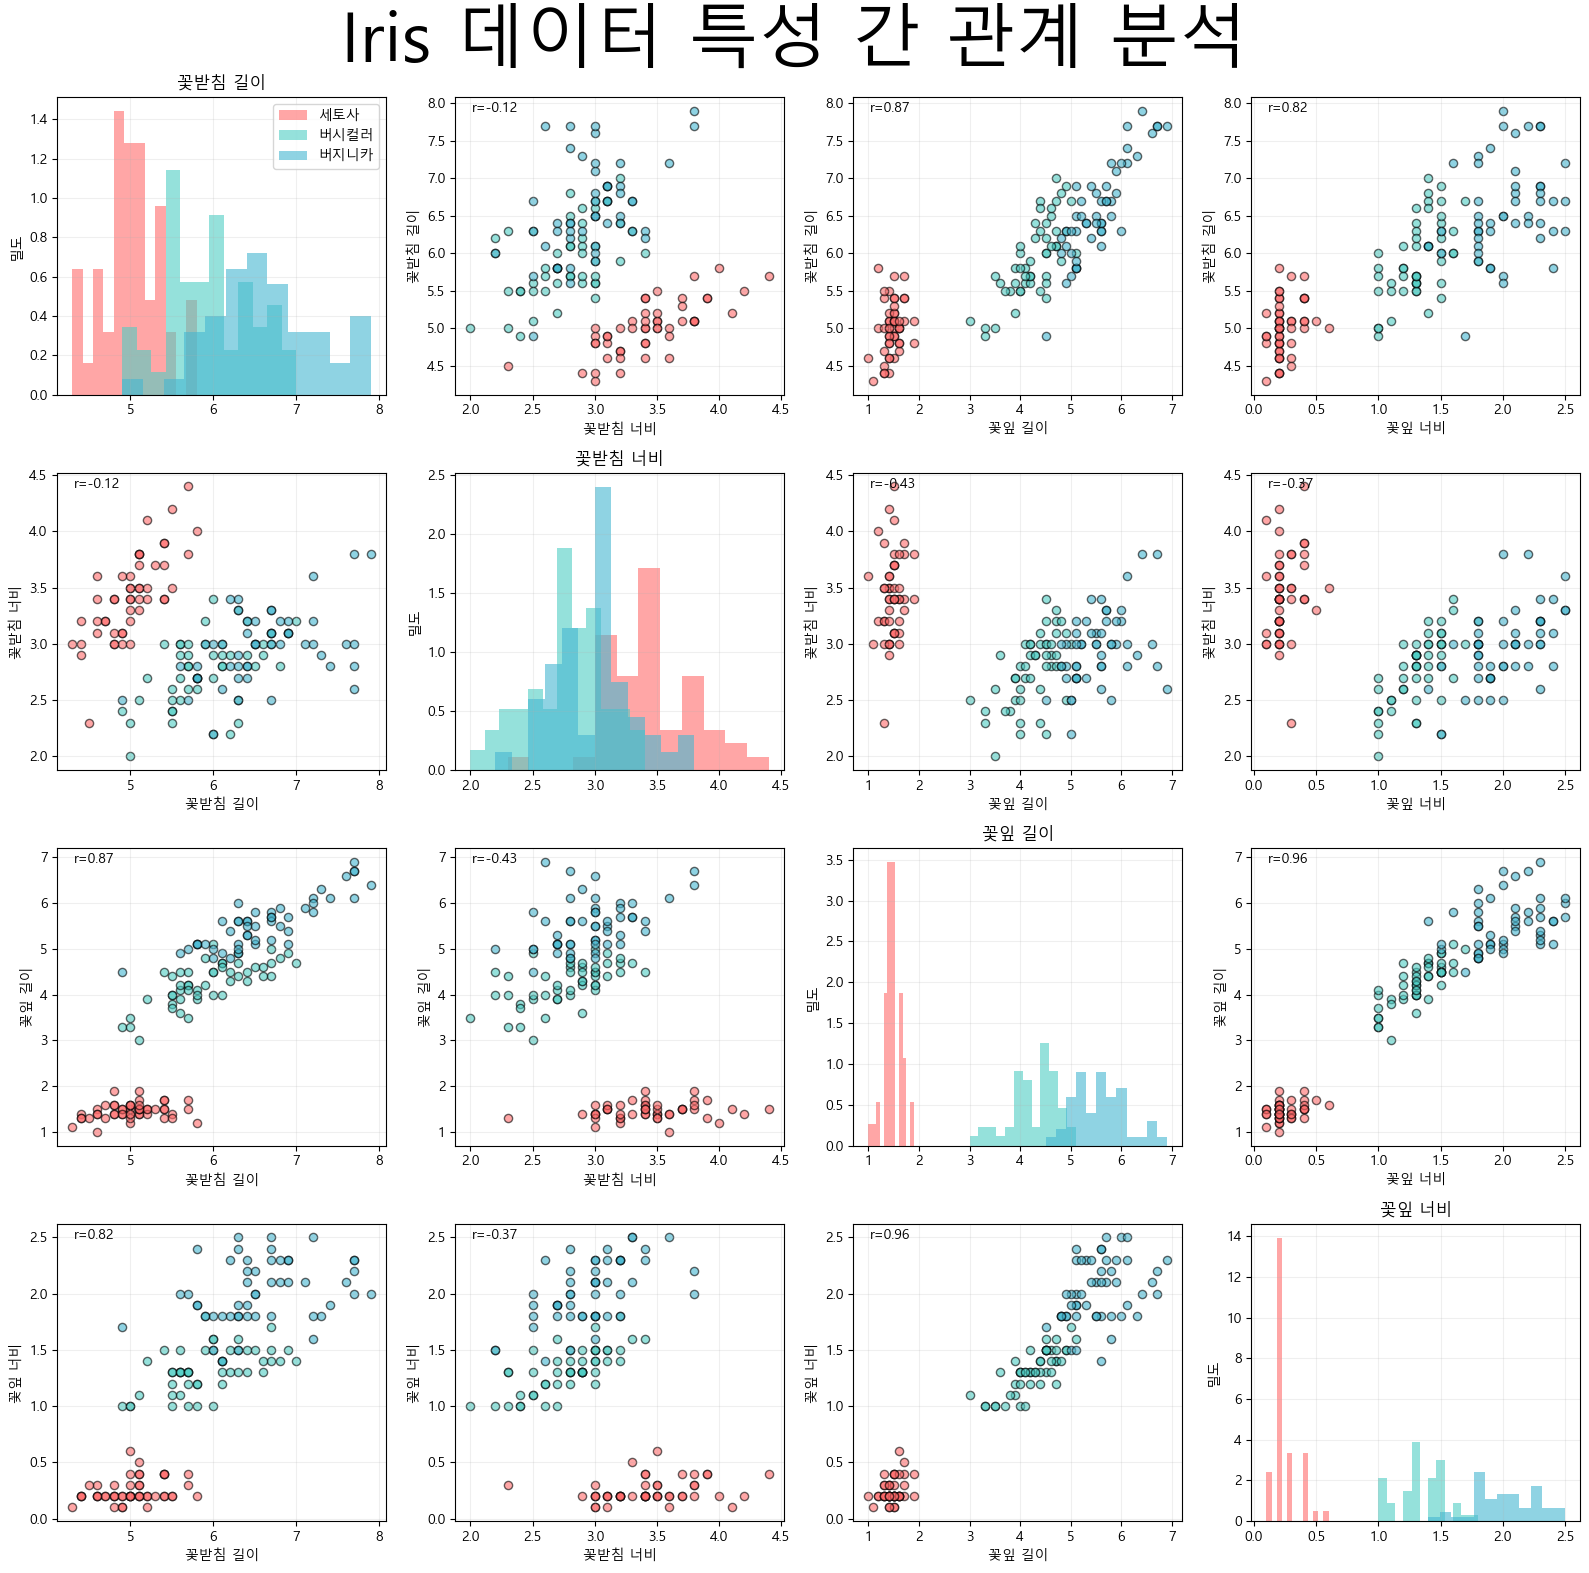

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
fig.suptitle("Iris 데이터 특성 간 관계 분석", fontsize=50)

for i in range(4):
    for j in range(4):
        ax = axes[i,j]
        if i == j:
            # 도수 분포를 위한 데이터를 정리
            for k, species in enumerate(target_names):
                data = df[df["species"] == species].iloc[:, i]
                ax.hist(data, 
                        bins=12,
                        density=True,
                        color=colors[k], 
                        alpha=0.6, 
                        label=target_names_kr[k])
            ax.set_title(feature_names_kr[i])
            ax.set_ylabel("밀도")
            if i == 0:
                ax.legend()
        else:
            for k, species in enumerate(target_names):
                data = df[df["species"] == species]
                x = data.iloc[:, j]
                y = data.iloc[:, i]
                ax.scatter(x,
                           y,
                           color=colors[k],
                           alpha=0.6,
                           label=target_names_kr[k],
                           s=35,
                           edgecolors="black")
            ax.set_xlabel(feature_names_kr[j])
            ax.set_ylabel(feature_names_kr[i])

            corr = df.iloc[:, [j,i]].corr().iloc[0,1]
            ax.text(
                0.05,
                0.95,
                f"r={corr:.2f}",
                transform=ax.transAxes)

        ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()